# Functionality: visualization of ciCOH Hist

## Import Packages 

In [1]:
import os, sys
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt

from igraph.drawing.text import TextDrawer
import cairo

In [2]:
# import_nbmodule used for import package in .ipynb
import import_nbmodule

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)


# import animal_folder function in util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

# import graphVisual in connAnalyTool/graphVisual.pynb 
from connAnalyTool import graphVisual

importing Jupyter notebook from /home/lingling/Insync/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/folder_extract.ipynb
importing Jupyter notebook from /home/lingling/Insync/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/graphVisual.ipynb


## Preparasion

### exp subfolders & code_corresfolder

In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
nb_name = nb_name[0: nb_name.find('.ipynb')]

# corresfolder
corresfolder,correparentfolder = code_corresfolder(os.getcwd(), nb_name)

### global parameters

In [5]:
# frequency
freq = [16, 18]
strfreq = 'freq' + str(freq[0]) + '_' + str(freq[1])


# eventphase
event = 'rest'

In [6]:
### text setup for brain areas ###
texts_area = dict()


texts_area['M1'] = [20, 500, 20]

texts_area['STN'] = [280, 140, 20]

texts_area['GP'] = [360, 250, 20]

In [7]:
halfs = False

### input setup

In [8]:
inputfolder = os.path.join(correparentfolder, 'm1_calcciCOH_rest')
filename =  'ciCOH_rest' + '_freq' + str(freq[0]) + '_' + str(freq[1])

if halfs:
    filename = filename + '_halfs'

file = os.path.join(inputfolder, filename + '.pickle')

### save setup

In [9]:
savefolder = corresfolder
savefile_prefix_origin = 'ciCOH_Hist' + '_' + strfreq 

if halfs:
    savefile_prefix_origin = savefile_prefix_origin + '_halfs'

## Load ciCOH and Channel

In [10]:
fp = open(file, 'rb')
ciCOH = pickle.load(fp)

In [11]:
# ciCOH
ciCOH_normal, ciCOH_mild = ciCOH['normal'], ciCOH['mild']

# channel information
chnInf_recchni, chnInf_matchni = ciCOH['chnInf_recchni'], ciCOH['chnInf_matchni']
chnInf_brainarea, chnInf_coord = ciCOH['chnInf_brainarea'], ciCOH['chnInf_coord']

## Hist

In [12]:
lowweight = 0.25

### ciCOH hist 

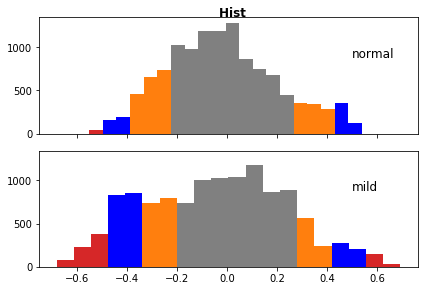

In [97]:
x_normal = np.reshape(ciCOH_normal, (-1))
x_mild = np.reshape(ciCOH_mild, (-1))

colors = ['gray', '#ff7f0e','b' ,'#d62728']
labels = ['no sig', 'lower 1/3', 'middle 1/3', 'higher 1/3']


xmax = max(max(abs(x_normal)), max(abs(x_mild)))
xmax = np.around(xmax, decimals=2)
thred0, thred1, thred2 = lowweight, lowweight + (xmax - lowweight)/3, lowweight + (xmax - lowweight) * 2/3

n_bins = 20

fig, axs = plt.subplots(2, 1, tight_layout=True, sharex = True, sharey = True)

# We can set the number of bins with the `bins` kwarg
N, bins, patches = axs[0].hist(x_normal, bins=n_bins, label = 'normal')




# no  sig part
idx_nosig = np.where(abs(bins)< thred0)[0]
for i in range(len(idx_nosig)):
    
    # len(bins) = len(patches) + 1
    if idx_nosig[i] == len(patches):
        continue
    patches[idx_nosig[i]].set_facecolor(colors[0])

        
# sig part1 
idx_sig = np.where((abs(bins)>=thred0) & (abs(bins)<thred1))[0]
for i in range(len(idx_sig)):
    
    # len(bins) = len(patches) + 1
    if idx_sig[i] == len(patches):
        continue
    patches[idx_sig[i]].set_facecolor(colors[1])
    
    
# sig part2 
idx_sig = np.where((abs(bins)>=thred1) & (abs(bins)<thred2))[0]
for i in range(len(idx_sig)):
    
    # len(bins) = len(patches) + 1
    if idx_sig[i] == len(patches):
        continue
    patches[idx_sig[i]].set_facecolor(colors[2])
    
    
    
# sig part3 
idx_sig = np.where(abs(bins)>=thred2)[0]
for i in range(len(idx_sig)):
    
    # len(bins) = len(patches) + 1
    if idx_sig[i] == len(patches):
        continue
    patches[idx_sig[i]].set_facecolor(colors[3])
    
axs[0].text(0.5, 1000, 'normal', {'fontsize': 12}, va="top")

    
### mild part ###

N, bins, patches = axs[1].hist(x_mild, bins=n_bins, label = colors)


# no  sig part
idx_nosig = np.where(abs(bins)< thred0)[0]
for i in range(len(idx_nosig)):
    
    # len(bins) = len(patches) + 1
    if idx_nosig[i] == len(patches):
        continue
    patches[idx_nosig[i]].set_facecolor(colors[0])

        
# sig part1 
idx_sig = np.where((abs(bins)>=thred0) & (abs(bins)<thred1))[0]
for i in range(len(idx_sig)):
    
    # len(bins) = len(patches) + 1
    if idx_sig[i] == len(patches):
        continue
    patches[idx_sig[i]].set_facecolor(colors[1])
    
    
# sig part2 
idx_sig = np.where((abs(bins)>=thred1) & (abs(bins)<thred2))[0]
for i in range(len(idx_sig)):
    
    # len(bins) = len(patches) + 1
    if idx_sig[i] == len(patches):
        continue
    patches[idx_sig[i]].set_facecolor(colors[2])
    
    
    
# sig part3 
idx_sig = np.where(abs(bins)>=thred2)[0]
for i in range(len(idx_sig)):
    
    # len(bins) = len(patches) + 1
    if idx_sig[i] == len(patches):
        continue
    patches[idx_sig[i]].set_facecolor(colors[3])


axs[1].text(0.5, 1000, 'mild', {'fontsize': 12}, va="top")    
    
    
    
title = 'Hist ' 
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, savefile_prefix_origin + title + '.png'))

In [102]:
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(A)
m = A.shape[0]
r,c = np.triu_indices(m,1)
print(r)
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[0 0 0 1 1 2]
[1 2 3 2 3 3]


In [ ]:
x_normal = np.reshape(ciCOH_normal, (-1))
x_mild = np.reshape(ciCOH_mild, (-1))


x_normal = x_normal[abs(x_normal)>=lowweight]
x_mild = x_mild[abs(x_mild)>=lowweight]


n_bins = 20

fig, axs = plt.subplots(2, 1, tight_layout=True, sharex = True, sharey = True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal, bins=n_bins, label = 'normal')
axs[1].hist(x_mild, bins=n_bins, label = 'mild')


axs[0].legend()
axs[1].legend()

title = 'Hist ' + '>' + str(lowweight)
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, savefile_prefix_origin + title + '.png'))

In [ ]:
x_normal = np.reshape(abs(ciCOH_normal), (-1))
x_mild = np.reshape(abs(ciCOH_mild), (-1))



x_normal = x_normal[abs(x_normal)>=lowweight]
x_mild = x_mild[abs(x_mild)>=lowweight]



n_bins = 20

fig, axs = plt.subplots(2, 1, tight_layout=True, sharex = True, sharey = True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal, bins=n_bins, label = 'normal')
axs[1].hist(x_mild, bins=n_bins, label = 'mild')



axs[0].legend()
axs[1].legend()


title = 'Hist ' + '> abs(' + str(lowweight) + ')'
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, savefile_prefix_origin + title + '.png'))